In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


In [28]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [29]:
full = train.append( test , ignore_index = True )
train = full[ 0:891 ]
test = full[891:]
train.head()


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


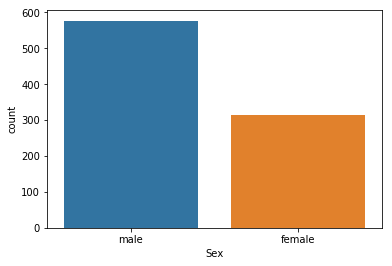

In [30]:
p = sns.countplot(data=train,x= 'Sex')

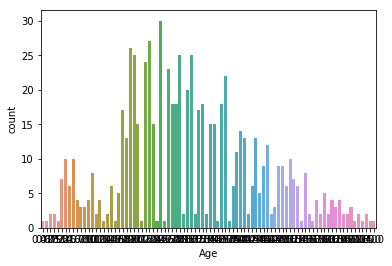

In [31]:
p = sns.countplot(data=train,x= 'Age')

Text(0.5, 1.0, 'C = Cherbourg, Q = Queenstown, S = Southampton')

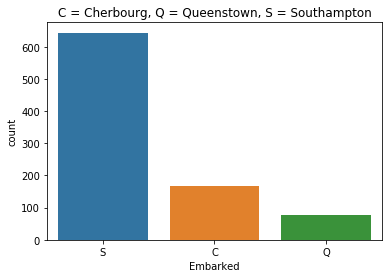

In [32]:
sns.countplot(data=train,x= 'Embarked')
plt.title('C = Cherbourg, Q = Queenstown, S = Southampton')


In [25]:
#train["Sex"] = train["Sex"].fillna("NA")
#train["Embarked"] = train["Embarked"].fillna("U")
#test["Sex"] = test["Sex"].fillna("NA")
#test["Embarked"] = test["Embarked"].fillna("U")
#train[['Pclass', 'Age', 'SibSp', 'Fare']] = train[['Pclass', 'Age', 'SibSp', 'Fare']].fillna(0)
#test[['Pclass', 'Age', 'SibSp', 'Fare']] = test[['Pclass', 'Age', 'SibSp', 'Fare']].fillna(0)

In [33]:
#genders = {'male': 0, 'female': 1, 'NA': 2}
sex = pd.Series( np.where( full.Sex == 'male' , 1 , 0 ) , name = 'Sex' ) 
#embarks = {'C': 0, 'Q': 1, 'S': 2,}
#emb_train = pd.get_dummies( train.Embarked , prefix='Embarked' )
#emb_test = pd.get_dummies( test.Embarked , prefix='Embarked' )

#train['Sex'] = train['Sex'].apply(lambda x: genders[x])
#train_data['Embarked'] = train_data['Embarked'].apply(lambda x: embarks[x])
#test['Sex'] = test['Sex'].apply(lambda x: genders[x])
#test_data['Embarked'] = test_data['Embarked'].apply(lambda x: embarks[x])

In [38]:


# Fill missing values of Age with the average of Age (mean)
full.Age.fillna( full.Age.mean() )

# Fill missing values of Fare with the average of Fare (mean)
full.Fare.fillna( full.Fare.mean() )





0         7.2500
1        71.2833
2         7.9250
3        53.1000
4         8.0500
5         8.4583
6        51.8625
7        21.0750
8        11.1333
9        30.0708
10       16.7000
11       26.5500
12        8.0500
13       31.2750
14        7.8542
15       16.0000
16       29.1250
17       13.0000
18       18.0000
19        7.2250
20       26.0000
21       13.0000
22        8.0292
23       35.5000
24       21.0750
25       31.3875
26        7.2250
27      263.0000
28        7.8792
29        7.8958
          ...   
1279      7.7500
1280     21.0750
1281     93.5000
1282     39.4000
1283     20.2500
1284     10.5000
1285     22.0250
1286     60.0000
1287      7.2500
1288     79.2000
1289      7.7750
1290      7.7333
1291    164.8667
1292     21.0000
1293     59.4000
1294     47.1000
1295     27.7208
1296     13.8625
1297     10.5000
1298    211.5000
1299      7.7208
1300     13.7750
1301      7.7500
1302     90.0000
1303      7.7750
1304      8.0500
1305    108.9000
1306      7.25

In [35]:
cabin = pd.DataFrame()

# replacing missing cabins with U (for Uknown)
cabin[ 'Cabin' ] = full.Cabin.fillna( 'U' )

# mapping each Cabin value with the cabin letter
cabin[ 'Cabin' ] = cabin[ 'Cabin' ].map( lambda c : c[0] )

# dummy encoding ...
cabin = pd.get_dummies( cabin['Cabin'] , prefix = 'Cabin' )

cabin.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [36]:
# Create a new variable for every unique value of Embarked
embarked = pd.get_dummies( full.Embarked , prefix='Embarked' )
embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [40]:
full_X = pd.concat( [ full.Age, full.Fare , embarked , cabin , sex ] , axis=1 )
full_X.head()

,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Sex
0,22.0,7.2500,0,0,1,0,0,0,0,0,0,0,0,1,1
1,38.0,71.2833,1,0,0,0,0,1,0,0,0,0,0,0,0
2,26.0,7.9250,0,0,1,0,0,0,0,0,0,0,0,1,0
3,35.0,53.1000,0,0,1,0,0,1,0,0,0,0,0,0,0
4,35.0,8.0500,0,0,1,0,0,0,0,0,0,0,0,1,1


In [46]:
from sklearn.model_selection import train_test_split

train_valid_X = full_X[ 0:891 ]
train_valid_y = train.Survived
test_X = full_X[ 891: ]


In [47]:
from xgboost import XGBClassifier


In [48]:
model = XGBClassifier()


In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

train_valid_X = sc.fit_transform(train_valid_X)

In [50]:
train_X , valid_X , train_y , valid_y = train_test_split( train_valid_X , train_valid_y , train_size = .7 )


In [51]:
model.fit( train_X , train_y )

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [57]:
print (model.score( train_X , train_y ) , model.score( valid_X , valid_y ))
#predict = model.predict(valid_X)

0.8860353130016051 0.8022388059701493


In [54]:
#from sklearn.metrics import accuracy_score


In [56]:
#accuracy_score(predict, valid_y)
#try increasing features and chaning model to random forest or svm 

0.8022388059701493